# Variational AutoEncoder - Basic

In [ ]:
import numpy as np

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
import random

import pandas as pd

from torchvision.utils import save_image

In [2]:
# import torchvision.datasets as dset
from mnist import MNIST # <= 다른거

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

### Check GPU

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

cuda


In [4]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

### Import Dataset

In [5]:
mnist = MNIST('../image_data/MNIST/MNIST/raw')
x_train, y_train = mnist.load_training()
x_test, y_test = mnist.load_testing()

In [6]:
print("x_train 의 length = {}".format(len(x_train)))
print("x_test 의 length = {}".format(len(x_test)))

x_train 의 length = 60000
x_test 의 length = 10000


### Data PreProcessing

In [7]:
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

In [ ]:
# Rescale the image data to 0 ~ 1. 
x_train = 
x_test =



### Load Dataset using DataLoader

In [9]:
batch_size = 256

# batch size 만큼 나누어서 data를 로드
train_loader = torch.utils.data.DataLoader(x_train ,batch_size=batch_size, shuffle=True, num_workers=0,drop_last=False)
test_loader = torch.utils.data.DataLoader(x_test ,batch_size=len(x_test), shuffle=False, num_workers=0,drop_last=False)

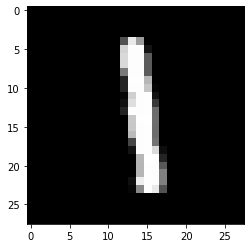

In [10]:
for batch_idx, image in enumerate(train_loader):
    plt.imshow(image[0].reshape(28,28), cmap="gray")
    break

### Make VAE Network

In [ ]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        
    # ===== 1 ============================================================================================================== #
    # Encoder 부분
    # hidden layer 를 한번만 통과 한 후 mu 와 variance 의 2개의 output layer 를 return 한다
    
    def encode(self, x):

        
        
         # Code
        
        

    # ===================================================================================================================== #
    
    
    # ===== 2 ============================================================================================================== #
    # Reparameterization Trick
    def reparameterize(self, mu_vector, logvar_vector):
        # 1) log 를 치워주자!
        # 2) 표준편차를 구하자
        # 3) Epsilon 을 만들어주자
        # 4) reparameterization trick 을 완성하자
        
        
         # Code
        
        

    # ===================================================================================================================== #


    # ===== 3 ============================================================================================================== #        
    # Decoder 부분
    # hidden layer(fc2)를 하나 통과한 후 다시 784 node의 output layer 를 만든후 sigmoid function 을 통과시켜준다.
    def decode(self, z):

        
        # Code
        
        
        
    # ===================================================================================================================== #
    
    
    # ===== 4 ============================================================================================================== #
    # 위에서부터 정의한 method 들을 이용해 하나의 network 생성
    # forward() 메소드는 model 오브젝트를 데이터와 함께 호출하면 자동으로 실행
    def forward(self, x):

        
        
         # Code
        
        
        
    # ======

In [11]:
model = VAE().to(device)

### Loss Function

In [12]:
def loss_function(recon_x, x, mu, logvar):


        
    return Bernouhlli_loss + KL_divergence

### Parameters and Optimizer

In [13]:
epoch = 100
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

### Train VAE Model

In [14]:
for num_epoch in range(epoch):
    avg_loss = 0
    
    for batch_idx, image in enumerate(train_loader):
        num_of_mini_batch = len(train_loader) # 235 가 나올것이다 60000/256 = 234.xx => 235
        
        input_x = image.reshape(-1, 784).to(device)  
        
        optimizer.zero_grad()
        
        recon_x, mu, logvar = model(input_x)
        
        loss = loss_function(recon_x, input_x, mu, logvar)
        loss.backward()

        optimizer.step()
        
        avg_loss += (loss.item()/num_of_mini_batch)
        
    if (num_epoch+1) % 10 == 0:
        print("Epoch = {} loss = {:.6f}".format(num_epoch+1, avg_loss))

10/100 epoch	Loss = 155.71
20/100 epoch	Loss = 150.47
30/100 epoch	Loss = 148.02
40/100 epoch	Loss = 146.54
50/100 epoch	Loss = 145.40
60/100 epoch	Loss = 144.55
70/100 epoch	Loss = 143.89
80/100 epoch	Loss = 143.33
90/100 epoch	Loss = 142.90
100/100 epoch	Loss = 142.40


### Save model

In [15]:
torch.save(model.state_dict(), './pre_trained/day06_06_VAE_Basic_MNIST_hidden_2.pth')

### Load model

In [16]:
model = VAE().to(device)

In [17]:
model.load_state_dict(torch.load('./pre_trained/day06_06_VAE_Basic_MNIST_hidden_2.pth', map_location=device))

<All keys matched successfully>

### Test Images

In [18]:
for batch_idx, image in enumerate(test_loader):
    with torch.no_grad():
        test_img = image.to(device)
        
        test_recon_x, _, _ = model(test_img)

In [ ]:
n = 10  # 몇개를 보일것인가
plt.figure(figsize=(20, 5)) # 전체 figure'들'의 총 행, 열의 크기)

for i in range(n):
    
    

### Generate New Images

In [20]:
for i in range(10):
    with torch.no_grad():
        sample_z = torch.randn(64,2).to(device)
        input_z = sample_z
        sample = model.decode(input_z).cpu()
        save_image(sample.reshape(64, 1, 28, 28),
                   './new_images/Basic_VAE_img_' + str(i) + str('_hidden2')+ '.png')